In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import OrdinalEncoder,StandardScaler
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import Lasso,Ridge,LinearRegression
#from sklearn.decomposition import PCA
#from seaborn import heatmap,pairplot
#from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [2]:
df1=pd.read_csv("../resources/House Prediction/train.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
OverallCond,YearBuilt,OverallQual

In [115]:
d=df1.isna().sum()
d[d>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [21]:
num_df1=df1.select_dtypes(exclude='object')
num_df1.shape

(1460, 38)

In [22]:
cat_df1=df1.select_dtypes(include='object')
cat_df1.shape

(1460, 43)

In [27]:

df2=df1.drop(droplist,axis=1)

array([  0, 512, 648, 576, 555, 480, 519, 738], dtype=int64)

In [154]:
lim=0.35
corrmat=num_df1.corr()
cond_corr=corrmat[abs(corrmat['SalePrice'])<lim]
corrmat=corrmat.drop(cond_corr.index,axis=1)
out1=corrmat[abs(corrmat['SalePrice'])>lim]

<AxesSubplot:>

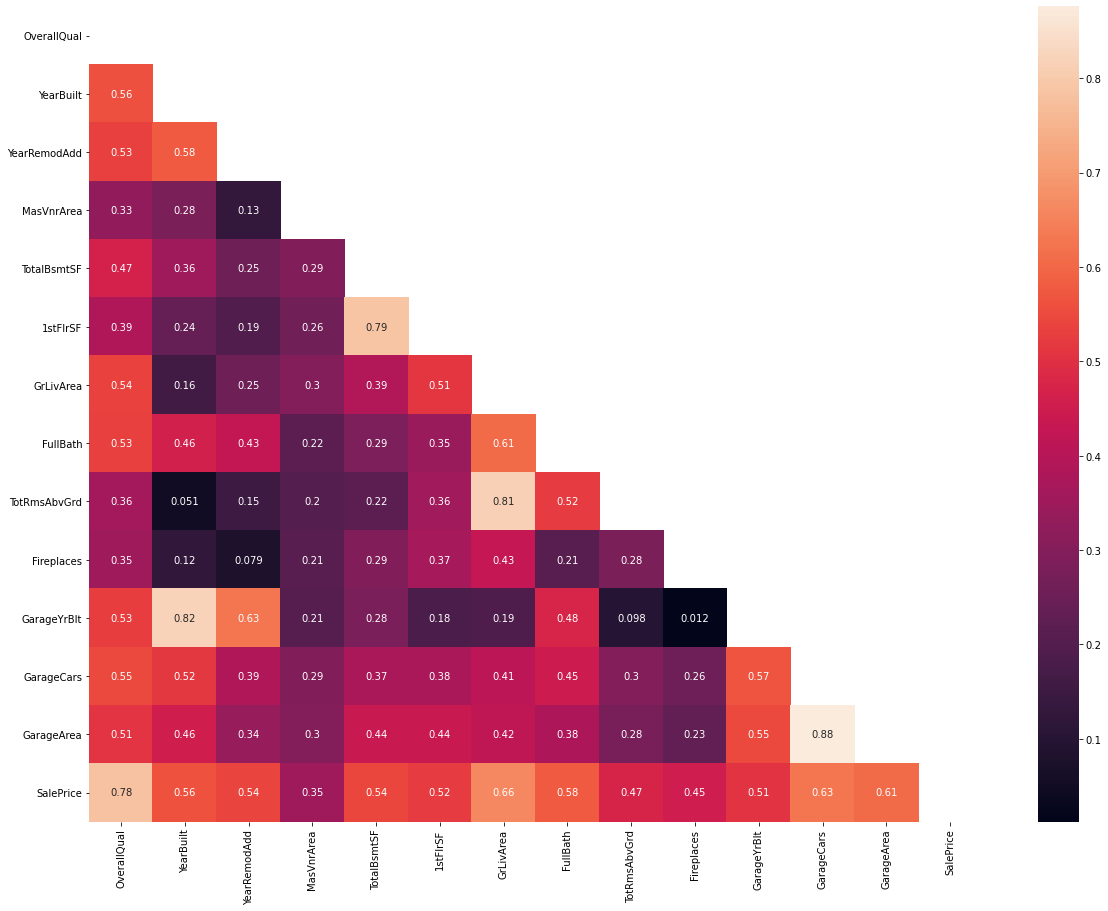

In [155]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(out1, dtype=bool))
sns.heatmap(out1,annot=True,mask=mask)

In [169]:
droplist=['GarageYrBlt','GarageArea']

In [173]:
l=num_df1.corr().SalePrice.sort_values()[:-1]
droplist=l[l<0.35].index.to_list()+droplist
l

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
Name: SalePrice, dtype: float64

In [96]:
df1.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [98]:
df1.groupby('MSZoning').SalePrice.mean().sort_values()

MSZoning
C (all)     74528.000000
RM         126316.830275
RH         131558.375000
RL         191004.994787
FV         214014.061538
Name: SalePrice, dtype: float64

In [99]:
df1[df1.MSZoning=='C (all)']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
88,89,50,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2009,ConLD,Abnorml,85000
93,94,190,C (all),60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Normal,133900
495,496,30,C (all),60.0,7879,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,WD,Abnorml,34900
557,558,50,C (all),60.0,11040,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,9,2006,COD,Normal,108000
711,712,50,C (all),66.0,8712,Pave,Pave,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,102776
812,813,20,C (all),66.0,8712,Grvl,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,Shed,54,6,2010,WD,Alloca,55993
916,917,20,C (all),50.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Abnorml,35311
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1279,1280,50,C (all),60.0,7500,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,COD,Abnorml,68400


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

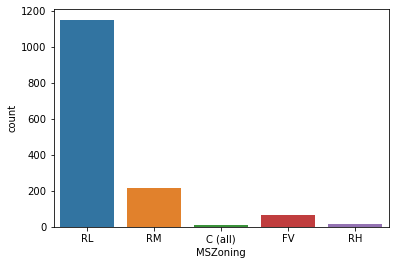

In [105]:
sns.countplot(x=df1.MSZoning)

In [112]:
df1[df1.MSZoning=='RM'].SalePrice.describe()

count       218.000000
mean     126316.830275
std       48521.689833
min       37900.000000
25%      100000.000000
50%      120500.000000
75%      140000.000000
max      475000.000000
Name: SalePrice, dtype: float64

In [108]:
df1[df1.MSZoning=='FV'].SalePrice.describe()

count        65.000000
mean     214014.061538
std       52369.662067
min      144152.000000
25%      174000.000000
50%      205950.000000
75%      250000.000000
max      370878.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

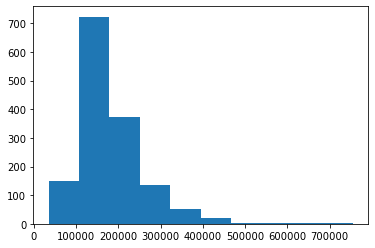

In [116]:
df1.SalePrice.hist(grid=False)

In [141]:
Q3,Q1=df1.SalePrice.quantile([0.75,0.25])
IQR=Q3-Q1
upper_limit,lower_limit=Q3+1.5*IQR,Q1-1.5*IQR
upper_limit,lower_limit

(340037.5, 3937.5)

<AxesSubplot:>

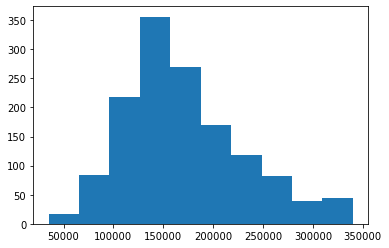

In [143]:
df2=df1[(df1.SalePrice<Q3+1.5*IQR)]
df2.SalePrice.hist(grid=False)

In [146]:
df2.SalePrice.describe()

count      1399.000000
mean     170237.127234
std       59230.130817
min       34900.000000
25%      129000.000000
50%      159500.000000
75%      203500.000000
max      340000.000000
Name: SalePrice, dtype: float64

In [147]:
df2.groupby('MSZoning').SalePrice.mean().sort_values()

MSZoning
C (all)     74528.000000
RM         123470.226852
RH         131558.375000
RL         178501.301006
FV         211563.062500
Name: SalePrice, dtype: float64

In [148]:
df2.LotConfig.unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [151]:
df2.groupby('LotConfig').SalePrice.mean().sort_values()

LotConfig
Inside     166761.011905
Corner     172306.729412
FR2        173224.086957
CulDSac    201467.639535
FR3        208475.000000
Name: SalePrice, dtype: float64

In [152]:
df2.groupby('MiscFeature').SalePrice.mean().sort_values()

MiscFeature
Othr     94000.000000
Shed    151187.612245
Gar2    170750.000000
TenC    250000.000000
Name: SalePrice, dtype: float64

In [153]:
for col in cat_df1.columns:
    unq=df2.col.unique()
    if

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [175]:
test=pd.read_csv("../resources/House Prediction/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [177]:
test.MSZoning.unique()

array(['RH', 'RL', 'RM', 'FV', 'C (all)', nan], dtype=object)

In [ ]:
['RoofMatl','RoofStyle','MiscFeature','PoolQC','GarageType']

In [182]:
df2.groupby('Fence').SalePrice.mean().sort_values()

Fence
MnWw     134286.363636
GdWo     135839.301887
MnPrv    143638.200000
GdPrv    173822.758621
Name: SalePrice, dtype: float64